In [1]:
import numpy as np
import skimage as sk
from skimage import io
import heapq

In [2]:
path = 'stark.jpg'
img = io.imread(path)
print(img.shape)

(500, 458, 3)


In [3]:
def rgb2gray(img):
    r = img[:, :, 0] // 3
    g = img[:, :, 1] // 3
    b = img[:, :, 2] // 3
    return r + g + b

In [4]:
io.imshow(rgb2gray(img))

In [5]:
def rle(img):
    img = rgb2gray(img)
    res = [[] for i in range(len(img))]
    curr_count = 1
    for i in range(len(img)):
        for j in range(1, len(img[i])):
            if img[i][j] != img[i][j - 1]:
                res[i].append((curr_count, img[i][j - 1]))
                curr_count = 1
            else:
                curr_count += 1
        res[i].append((curr_count, img[i][j]))
        curr_count = 1
    return(res)

In [6]:
print(rle(img))

[[(2, 190), (1, 193), (1, 195), (1, 196), (1, 199), (1, 200), (1, 203), (1, 207), (1, 210), (1, 214), (1, 218), (1, 222), (1, 225), (1, 227), (1, 226), (1, 225), (1, 227), (1, 231), (2, 232), (1, 231), (2, 234), (1, 235), (1, 236), (1, 240), (1, 243), (1, 244), (1, 243), (1, 244), (1, 247), (1, 246), (1, 247), (1, 248), (3, 246), (1, 247), (1, 248), (1, 249), (1, 250), (1, 248), (2, 247), (1, 248), (1, 250), (4, 249), (3, 248), (1, 249), (2, 250), (2, 251), (2, 250), (1, 251), (2, 252), (2, 250), (2, 251), (2, 252), (2, 251), (5, 253), (8, 252), (3, 250), (3, 251), (5, 250), (2, 252), (4, 253), (2, 252), (1, 249), (1, 250), (3, 248), (1, 249), (3, 252), (2, 253), (1, 249), (1, 250), (1, 248), (1, 249), (1, 245), (1, 244), (4, 242), (1, 241), (1, 239), (1, 240), (1, 244), (1, 243), (1, 241), (1, 242), (1, 241), (1, 239), (1, 238), (1, 235), (1, 238), (1, 236), (1, 235), (1, 232), (2, 230), (1, 227), (1, 226), (2, 224), (1, 220), (1, 219), (1, 215), (1, 214), (1, 211), (1, 212), (1, 210)

In [7]:
def derle(res_of_rle):
    res = [[] for i in range(len(res_of_rle))]
    for i in range(len(res_of_rle)):
        for j in res_of_rle[i]:
            for k in range(j[0]):
                res[i].append(j[1])
    res = np.array(res, dtype=np.uint8)
    return res

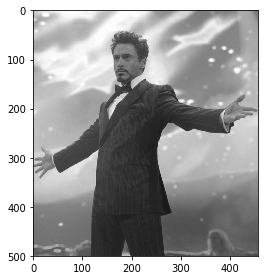

In [8]:
io.imshow(derle(rle(img)))

In [9]:
# [1680, [1,2,3]]
def haffman(img):
    img = rgb2gray(img)
    d = {}
    for i in range(256):
        d[i] = 0
    for i in img:
        for j in i:
            d[j] += 1
    temp = []
    for k, v in d.items():
        temp.append((v, [k]))
    heapq.heapify(temp)
    codes = [''] * 256
    while(len(temp) >= 2):
        min_min = heapq.heappop(temp)
        min_max = heapq.heappop(temp)
        for i in min_min[1]:
            codes[i] = '0' + codes[i]
        for i in min_max[1]:
            codes[i] = '1' + codes[i]
        heapq.heappush(temp, (min_min[0] + min_max[0], min_min[1] + min_max[1]))
    res = []
    for i in img:
        res.append(''.join([codes[j] for j in i]))
    return res, codes

In [10]:
def dehaffman(res, codes):
    img = []
    d = {}
    for i in range(len(codes)):
        d[codes[i]] = i
    s = ''
    for i in res:
        img.append([])
        for j in i:
            s += j
            if s in d:
                img[-1].append(d[s])
                s = ''
    return np.array(img, dtype=np.uint8)

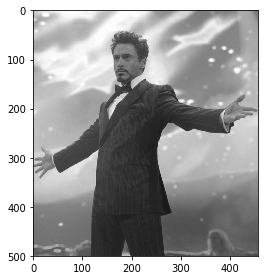

In [11]:
io.imshow(dehaffman(*haffman(img)))

In [12]:
print(haffman(img))

(['1110000111000011000100110000011110101101010101111111001011000001001110011100001100111010100001101111111011111101110111110101111111011111101110000110010001010100010101000110011111101001111101000001011000000110000101000100101100101010010010110010101001100111011111010110011111101001101111101011111010111110101100111111010011111111001010001101110100110110011101100111111010011010001101111110011111110011111110011111110011110100111110100111110100111111110010100011001000110000011100000111001000110010001100000111011011111110111110100011001000110000011100000111011011111110111110000111000001110011101000011101000011101000011101000011101000110111111101111111011111110111111101111111011111110111111101111101000110010001100100011000001110000011100000111001000110010001100100011001000110010001101101111111011111011101000011101000011101000011101000110111111101111111111100101000110111010011111010011111010011111111001110111111101111111011111011101000011101000111111001010001101110100111111110011111101100010